In [19]:
import re
import jieba
import cntext as ct
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
from bertopic import BERTopic

umap_model = UMAP(n_neighbors=10, n_components=5, min_dist=0, metric='cosine')
# hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=1,metric='euclidean', cluster_selection_method='eom')
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom')

stopwords = ct.load_pkl_dict('STOPWORDS.pkl')['STOPWORDS']['chinese']

useless_dict = ['看待', '评价', '一个', '有没有', '推荐', '关注', '值得']
def clean_text(text):
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and w not in useless_dict]
    return ' '.join(words)



In [20]:
from gensim.models import KeyedVectors

chinese_news_models = KeyedVectors.load_word2vec_format('sgns.merge.word.bz2', unicode_errors='ignore')



In [21]:

topic_model = BERTopic(language="chinese (simplified)", 
                       embedding_model=chinese_news_models,
                       umap_model=umap_model,
                       hdbscan_model=hdbscan_model,
                       calculate_probabilities=False, 
                       verbose=True,
                       nr_topics='auto'
                       )

In [22]:
import pandas as pd
data = pd.read_csv('./zhihu_1.csv',encoding='UTF-8')
print(data.head())


         date                                           title   hot
0  2022-01-01                              国家主席习近平发表二〇二二年新年贺词  1380
1  2022-01-01  听完国家主席习近平发表的二〇二二年新年贺词，你有怎样的感触？对于自己的二〇二二年有什么期待？   879
2  2022-01-01                   如何评价你的 2021 年？对 2022 年你有哪些规划？   645
3  2022-01-01                           2021 年，你的生活有哪些最难忘的瞬间？   532
4  2022-01-01                                 什么才称得上真正的「大女主」？   504


In [23]:
data['date']=pd.to_datetime(data['date'])

In [24]:
#print(data['date'])
data_sorted = data.sort_values(by='date')
print(data_sorted)

            date                                              title   hot
0     2022-01-01                                 国家主席习近平发表二〇二二年新年贺词  1380
27    2022-01-01                          三年没工作的宝妈找了个工资三千多的工作，要去吗 ?    62
28    2022-01-01                                      如何让一个女孩子变得自信？    59
29    2022-01-01               顾客在餐厅吃到网红视频中被咬过的芝士，如何看待店家二次售卖食材这一行为？    50
30    2022-01-01                                      请问大学大一化妆真的好吗？    49
...          ...                                                ...   ...
18163 2022-12-31              2023 年，你对自己和所处的领域、行业和当下的社会生活有哪些建议与期待？    95
18164 2022-12-31  多地公布新冠感染率调查情况，四川实际感染率高于 63.52%，各地情况如何？防治需要关注哪些问题？    93
18165 2022-12-31  肺部 CT 检查需求暴增，专家称「肺炎实际检出率约 10％-20％」，何时需照 CT？检出肺...    91
18154 2022-12-31         媒体人爆料「足协主席陈戌源督战国足世预赛期间，每晚都有人陪打牌」，如何看待这种现象？   215
18193 2022-12-31                                    你们觉得过程重要还是结果重要？    59

[18194 rows x 3 columns]


In [25]:
data_sorted.reset_index(inplace=True)


In [26]:
weibo_content_list=data_sorted.iloc[:, 2].tolist()
weibo_hot_list=data_sorted.iloc[:,3].tolist()
weibo_tuple_list = []
for i in range(len(weibo_hot_list)):
    hot_num=int(weibo_hot_list[i]/200)
    if(hot_num==0):hot_num=1
    weibo_tuple_list.append((weibo_content_list[i],hot_num))



In [27]:
result_groups=[]
data_sorted['date']=pd.to_datetime(data_sorted['date'], format='%Y-%m-%d')
interval = pd.Timedelta(days=3)
start_time=data_sorted.iloc[0]['date']
start_index=data_sorted.index[0]
for index,row in data_sorted.iterrows():
    if row['date'] - start_time >= interval:
        result_groups.append(list(range(start_index,index)))
        start_time=row['date']
        start_index=index
result_groups.append(list(range(start_index,len(data_sorted))))
print(result_groups)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [28]:
topic_set=['政治 军事 经济 科技','电视剧 综艺 电影','运动 游戏 比赛','生活 健康 情感 家庭']
hot_data=[]

In [29]:
print(len(result_groups))

122


In [47]:
id=0
hot_data=[]
hot_content_data=[]
hot_represent_data=[]

for time_part in result_groups:
    hot_data_part=[]
    hot_data_content_part=[]
    hot_present_data_part=[]
    data_weibo_div=weibo_tuple_list[time_part[0]:time_part[-1]]
    data_final=[]
    for i in data_weibo_div:
        #data_final.append((clean_text(i[0]),i[1]))
        if(len(i[0])>=3):
            data_final.append((clean_text(i[0]),i[1]))
    data_times_final=[]
    for i in data_final:
        for j in range(i[1]):
            data_times_final.append(i[0])
    #print(len(data_times_final))
    docs = data_times_final
    topics, probs = topic_model.fit_transform(docs)
    topic_info=topic_model.get_topic_info()
    topic_index=topic_info.iloc[:,0].tolist()
    topic_cnt=topic_info.iloc[:,1].tolist()
    if(topic_index[0]!=-1):
        continue
    topic_info=topic_model.get_topic_info()
    topic_cnt=topic_info.iloc[:,1].tolist()
    topic_content=topic_info.iloc[:,2].tolist()
    topic_represent=topic_info.iloc[:,3].tolist()
    for my_topic in topic_set:
        hot_my_topic = 0  
        hot_content_slice=[]
        hot_represent_slice=[]
        if(len(topic_cnt)<=10):
            similar_topics, similarity = topic_model.find_topics(my_topic, top_n=1)
        elif(len(topic_cnt)<=20):
            similar_topics, similarity = topic_model.find_topics(my_topic, top_n=1)
        else:
            similar_topics, similarity = topic_model.find_topics(my_topic, top_n=2)
        for similar_topic in similar_topics:
            # hot_my_topic+=topic_cnt[similar_topic+1]*similarity[similar_topics.index(similar_topic)]
            
            if(similar_topic == -1):
                continue
            else:
                if(similarity[similar_topics.index(similar_topic)]>=0.6):
                    hot_my_topic+=topic_cnt[similar_topic+1]*similarity[similar_topics.index(similar_topic)]
                    hot_content_slice.append(topic_content[similar_topic+1])
                    hot_represent_slice.extend(topic_represent[similar_topic+1])
        hot_data_part.append(hot_my_topic)
        hot_data_content_part.append(hot_content_slice)
        hot_present_data_part.append(hot_represent_slice)
        

    hot_data.append(hot_data_part)
    hot_content_data.append(hot_data_content_part)
    hot_represent_data.append(hot_present_data_part)
    # flg = topic_model.visualize_documents(docs)
    # flg.write_image(f'img/{id}.png')
    id+=1


    

2023-12-25 14:04:00,463 - BERTopic - Embedding - Transforming documents to embeddings.
100%|██████████| 182/182 [00:00<00:00, 12737.16it/s]
2023-12-25 14:04:00,509 - BERTopic - Embedding - Completed ✓
2023-12-25 14:04:00,509 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-25 14:04:02,632 - BERTopic - Dimensionality - Completed ✓
2023-12-25 14:04:02,633 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-25 14:04:02,639 - BERTopic - Cluster - Completed ✓
2023-12-25 14:04:02,640 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-25 14:04:02,659 - BERTopic - Representation - Completed ✓
2023-12-25 14:04:02,659 - BERTopic - Topic reduction - Reducing number of topics
2023-12-25 14:04:02,684 - BERTopic - Topic reduction - Reduced number of topics from 10 to 10
2023-12-25 14:04:02,870 - BERTopic - Embedding - Transforming documents to embeddings.
100%|██████████| 295/295 [00:00<00:00, 1702

In [48]:
hot_data_trans=[]
for i in range(len(hot_data[0])):
    hot_this_topic=[]
    for j in hot_data:
        hot_this_topic.append(j[i])
    hot_data_trans.append(hot_this_topic)

hot_content_data_trans=[]
print(hot_content_data)
for i in range(len(hot_content_data[0])):
    hot_this_topic=[]
    for j in hot_content_data:
        hot_this_topic.append(j[i])
    hot_content_data_trans.append(hot_this_topic)

hot_represent_data_trans=[]
for i in range(len(hot_represent_data[0])):
    hot_this_topic=[]
    for j in hot_represent_data:
        hot_this_topic.append(j[i])
    hot_represent_data_trans.append(hot_this_topic)


[[[], ['2_故事_电影_晚会_游戏'], [], ['2_故事_电影_晚会_游戏']], [[], ['15_联盟_英雄_斗鱼_主播'], ['15_联盟_英雄_斗鱼_主播'], ['0_数学_导师_没有_是不是']], [[], [], ['5_玩家_电脑城_衰退_原因'], ['2_孩子_猴子_遇到_父母']], [[], ['6_英雄_韩国_联盟_竞选'], ['6_英雄_韩国_联盟_竞选'], ['1_孩子_工资_懂事_想要']], [[], ['0_游戏_腾讯_电影_显示'], ['0_游戏_腾讯_电影_显示'], ['2_春节_爱哭_旅行_男生']], [[], [], ['0_医院_表示_没有_需要'], ['0_医院_表示_没有_需要']], [[], ['2_电视剧_开端_电影_2022'], [], ['10_温度_怀孕_睡觉_喜欢']], [[], ['8_电视剧_结局_开端_'], ['0_中国_2022_美国_游戏'], ['2_过年_孩子_很多_生活']], [[], [], [], []], [[], [], ['3_比赛_短道_韩国_冬奥会'], ['0_孩子_游戏_现在_年轻人']], [[], ['13_玩家_steam_上架_系列'], ['1_冬奥会_北京_运动员_立法'], []], [[], [], [], ['0_原神_是否_喜欢_应该']], [[], [], ['3_冬奥会_北京_运动_夺冠'], []], [[], ['5_口味_之刃_鬼灭_麦当劳'], ['5_口味_之刃_鬼灭_麦当劳'], ['7_工作_124_面临_周周']], [[], ['23_演技_老戏骨_实际上_看似'], ['11_法环_尔登_游戏_25', '1_考研_请问_退休_成绩'], ['1_考研_请问_退休_成绩', '20_一次_称泽_看到_活着']], [['11_中国_接受_世界大战_采访'], [], ['15_大厂_地球_概率_战争片'], ['0_游戏_是不是_小时_以前']], [[], [], ['1_媒体_俄罗斯_推广_办公'], ['0_委员_全国政协_每天_同事']], [[], [], [], []], [[], [], ['21_决赛_欧冠_皇马_本泽马', '20_海贼王_1043_觉醒_漫画'], 

In [32]:
# baseline=[]
# baseline.append(hot_content_data_trans)
# baseline.append(hot_data_trans)
# baseline.append(hot_represent_data_trans)
# import numpy as np
# bs_local=np.asarray(baseline,dtype=object)
# np.save('baseline.npy',bs_local) # 保存为.npy格式
# loaded_array = np.load('baseline.npy', allow_pickle=True)

# # 将数组转换为普通的 Python 列表
# loaded_list = loaded_array.tolist()


In [33]:

# ['政治 军事','娱乐 综艺 明星','体育 游戏 运动','生活 健康 情感','财经','科技 教育']

In [49]:
test_tuple_list=[]
topic_number=2
for i in range(len(hot_data_trans[2])):
    test_tuple_list.append((hot_content_data_trans[topic_number][i],hot_data_trans[topic_number][i],hot_represent_data_trans[topic_number][i]))
    if i == 28 or i == 64 or i == 87:
        print('day:', i, hot_represent_data_trans[topic_number][i])

day: 28 []
day: 64 ['孩子', '需要', '应该', '30', '选择', '经济', '复读', '感觉', '意义', '中国']
day: 87 ['总决赛', 's12', '全球', '续约', '止步', '五局', 't1', '退役', '选手', '鏖战']


findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti


findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because

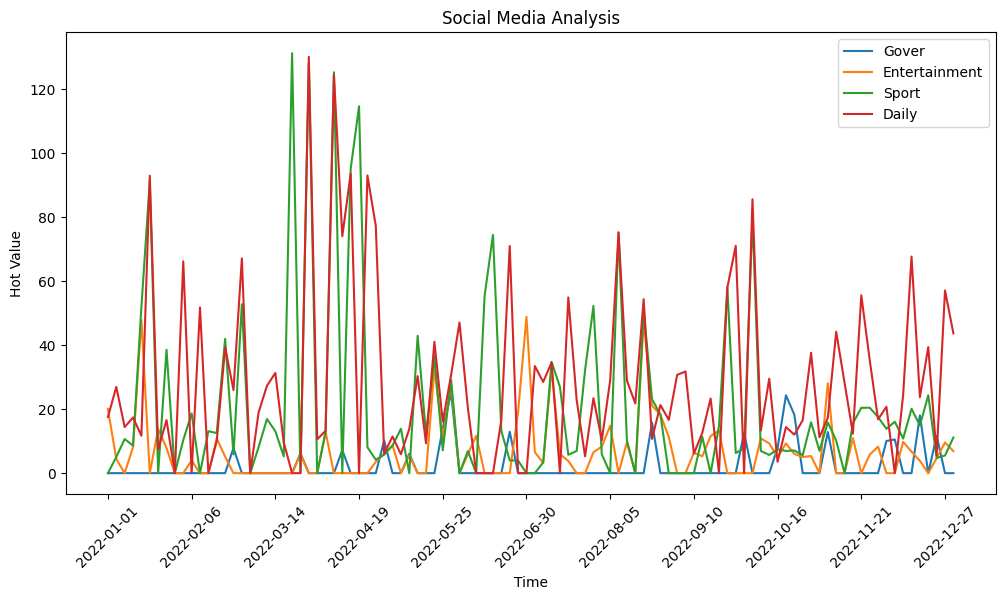

In [50]:
import matplotlib.pyplot as plt
# 创建一个新的图形
plt.figure(figsize=(12, 6))
topic_set_plt=['Gover','Entertainment','Sport','Daily','Money','IT']

xticks = list(pd.date_range('2022-01-01', '2022-12-31', freq='36D').format(formatter=lambda x: x.strftime('%Y-%m-%d')))
plt.xticks([i*10 for i in range(11)], xticks, rotation=45)

# 遍历每个列表并画折线
for i, line_data in enumerate(hot_data_trans):
    plt.plot(line_data, label=f'{topic_set_plt[i]}')

# 添加标签和标题
plt.xlabel('Time')
plt.ylabel('Hot Value')
plt.title('Social Media Analysis')

# 添加图例
plt.legend()

# 显示图形
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti


findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: kaiti
findfont: Generic family 'sans-serif' not found because

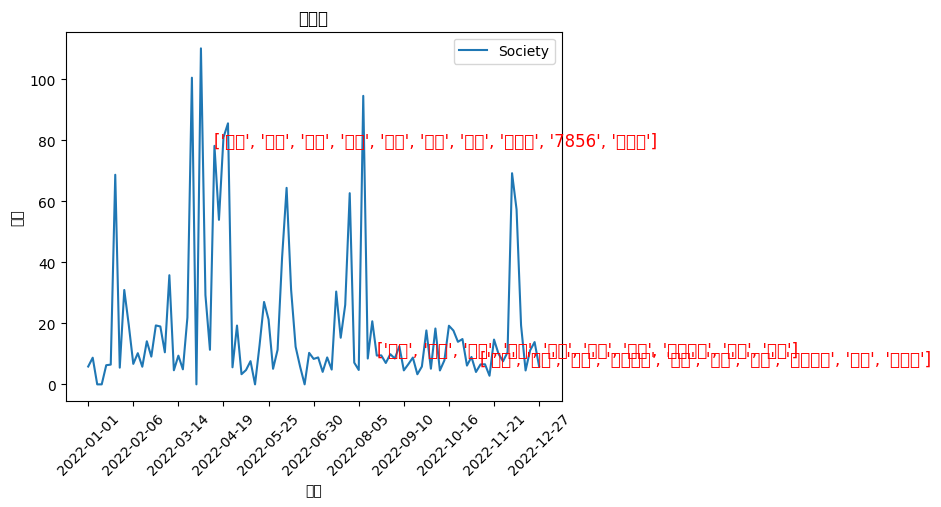

In [36]:
import matplotlib.pyplot as plt
# 创建一个新的图形
plt.figure()
plt.rcParams['font.sans-serif']=['kaiti']
topic_set_plt=['Society','Entertainment','Sport','Daily','Health']


# 遍历每个列表并画折线
xticks = list(pd.date_range('2022-01-01', '2022-12-31', freq='36D').format(formatter=lambda x: x.strftime('%Y-%m-%d')))
plt.xticks([i*10 for i in range(11)], xticks, rotation=45)
show_topic = 0
day = [28, 64, 87]
# print(xticks[day // 2])
for i, line_data in enumerate(hot_data_trans):
    if i != show_topic:
        continue
    plt.plot(line_data, label=f'{topic_set_plt[i]}')
    for j in day:
        plt.text(j, line_data[j], hot_represent_data_trans[show_topic][j], fontsize=12, color='red')    
    
# 添加标签和标题
plt.xlabel('日期')
plt.ylabel('热度')
plt.title('热度图')

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [37]:
from datetime import datetime, timedelta

# 设置开始日期和结束日期
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# 设置步长为3天
step = timedelta(days=3)

# 生成日期序列
date_list = [start_date + i * step for i in range((end_date - start_date) // step + 1)]

# 将日期格式化为字符串
formatted_date_list = [date.strftime('%m月%d日') for date in date_list]

# 打印生成的日期列表
print(formatted_date_list)


['01月01日', '01月04日', '01月07日', '01月10日', '01月13日', '01月16日', '01月19日', '01月22日', '01月25日', '01月28日', '01月31日', '02月03日', '02月06日', '02月09日', '02月12日', '02月15日', '02月18日', '02月21日', '02月24日', '02月27日', '03月02日', '03月05日', '03月08日', '03月11日', '03月14日', '03月17日', '03月20日', '03月23日', '03月26日', '03月29日', '04月01日', '04月04日', '04月07日', '04月10日', '04月13日', '04月16日', '04月19日', '04月22日', '04月25日', '04月28日', '05月01日', '05月04日', '05月07日', '05月10日', '05月13日', '05月16日', '05月19日', '05月22日', '05月25日', '05月28日', '05月31日', '06月03日', '06月06日', '06月09日', '06月12日', '06月15日', '06月18日', '06月21日', '06月24日', '06月27日', '06月30日', '07月03日', '07月06日', '07月09日', '07月12日', '07月15日', '07月18日', '07月21日', '07月24日', '07月27日', '07月30日', '08月02日', '08月05日', '08月08日', '08月11日', '08月14日', '08月17日', '08月20日', '08月23日', '08月26日', '08月29日', '09月01日', '09月04日', '09月07日', '09月10日', '09月13日', '09月16日', '09月19日', '09月22日', '09月25日', '09月28日', '10月01日', '10月04日', '10月07日', '10月10日', '10月13日', '10月16日', '10月19日', '10月22日', '10月25日',

In [38]:
topic_number = 0
day_part = 
hot_data_trans_part=hot_data_trans[topic_number]
hot_content_trans_part=hot_content_data_trans[topic_number]

label_data=[]
for i in range(len(hot_data_trans)):
    if(hot_data_trans[i]>1000):
        label_data.append(hot_content_data_trans[i])
    else:
        label_data.append(' ')

for x, y in zip(x_axis_data, hot_data_trans_part):
    plt.text(x, y+0.3, '%.00f' % y, ha='center', va='bottom', fontsize=7.5)#y_axis_data1加标签数据
    
plt.plot(x_axis_data, hot_data_trans_part, 'b*--', alpha=0.5, linewidth=1, label='acc')#'bo-'表示蓝色实线，数据点实心原点标注
## plot中参数的含义分别是横轴值，纵轴值，线的形状（'s'方块,'o'实心圆点，'*'五角星   ...，颜色，透明度,线的宽度和标签 ，

plt.legend()  #显示上面的label
plt.xlabel('time') #x_label
plt.ylabel('number')#y_label
 
#plt.ylim(-1,1)#仅设置y轴坐标范围
plt.show()


SyntaxError: invalid syntax (2670275851.py, line 2)

In [ ]:
baseline=[]
baseline.append(hot_content_data_trans)
baseline.append(hot_data_trans)
baseline.append(hot_represent_data_trans)
import numpy as np
bs_local=np.asarray(baseline,dtype=object)
np.save('baseline_3.npy',bs_local) # 保存为.npy格式
# loaded_array = np.load('baseline.npy', allow_pickle=True)

# # 将数组转换为普通的 Python 列表
# loaded_list = loaded_array.tolist()
# hot_data_trans_new=loaded_list[1]


In [ ]:
import matplotlib.pyplot as plt
# 创建一个新的图形

plt.figure(figsize=(12, 6))
topic_set_plt=['Society','Entertainment','Sport','Daily','Health']


# 遍历每个列表并画折线
for i, line_data in enumerate(hot_data_trans_new):
    plt.plot(line_data, label=f'{topic_set_plt[i]}')

# 添加标签和标题
plt.xlabel('Time')
plt.ylabel('Hot Value')
plt.title('Social Media Analysis')

# 添加图例
plt.legend()
plt.xlim(0, len(hot_data_trans_new[0]))

# 显示图形
plt.show()

NameError: name 'hot_data_trans_new' is not defined

<Figure size 1200x600 with 0 Axes>

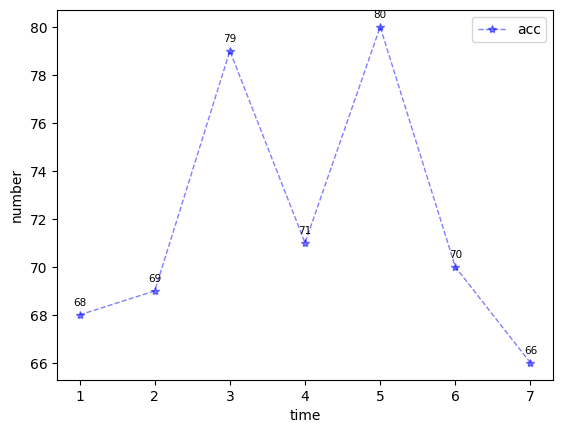

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_data = [1,2,3,4,5,6,7] #x
y_axis_data = [68,69,79,71,80,70,66] #y

for x, y in zip(x_axis_data, y_axis_data):
    plt.text(x, y+0.3, '%.00f' % y, ha='center', va='bottom', fontsize=7.5)#y_axis_data1加标签数据
    
plt.plot(x_axis_data, y_axis_data, 'b*--', alpha=0.5, linewidth=1, label='acc')#'bo-'表示蓝色实线，数据点实心原点标注
## plot中参数的含义分别是横轴值，纵轴值，线的形状（'s'方块,'o'实心圆点，'*'五角星   ...，颜色，透明度,线的宽度和标签 ，

plt.legend()  #显示上面的label
plt.xlabel('time') #x_label
plt.ylabel('number')#y_label
 
#plt.ylim(-1,1)#仅设置y轴坐标范围
plt.show()


In [ ]:
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,0,56,0_乡村_影响_新冠_带来,"[乡村, 影响, 新冠, 带来, 媒体, 老人, 发现, 不知, 大潮, 返乡]",[媒体 探访 疫情 乡村 发现 部分 乡村 老人 不知 新冠 「 感冒 」 乡村 「 扛 住...
1,1,9,1_胜利_签约_球队_2025,"[胜利, 签约, 球队, 2025, 37, 沙特, 双方, 加盟, 利雅得, 正式]",[37 岁 C 罗 正式 加盟 沙特 球队 利雅得 胜利 双方 签约 202...


In [ ]:
# 可视化选定的主题和文档
# topic_model.visualize_documents(docs)


In [ ]:
new_topics = topic_model.reduce_outliers(docs, topics)
topic_model.update_topics(docs, topics=new_topics)


0it [00:00, ?it/s]


ValueError: need at least one array to concatenate

In [ ]:
# topic_model.get_topic_info()


In [ ]:
flg = topic_model.visualize_documents(docs)
flg.write_image('output.png')


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
